In [ ]:
!pip install -U libsvm-official

  Preparing metadata (setup.py) ... done
  Created wheel for libsvm-official: filename=libsvm_official-3.32.0-cp310-cp310-linux_x86_64.whl size=123883 sha256=bdab1acfbfc6ca09407454c8dde7c66db366585d4cfd631d3f8524bbd295c9ad
  Stored in directory: /root/.cache/pip/wheels/61/3b/1b/73bb4869517f96a26c82b47ccdb9ec48f12f4466de2371eff6
Successfully built libsvm-official


In [ ]:
pip install numpy matplotlib pandas

In [ ]:
#p9
from libsvm.svmutil import *
import numpy as np

C = np.array([0.1, 1, 10])
Q = np.array([2,3,4])


def train (y,x, C, Q):
  prob = svm_problem(y,x)
  param = svm_parameter("-t 1 -c {} -d {} -r 1 -g 1".format(C, Q))
  model = svm_train(prob, param)

  sv = model.get_SV()
  return model, sv

def solve():
  c_min = 0
  q_min = 0
  min_sv = float('inf')

  for i in range(3):
    for j in range(3):
      print("training")
      y , x = svm_read_problem("train.dat")

      for k in range(len(y)):
        if y[k] == 4:
          y[k] = 1
        else:
          y[k] = -1

      model, sv = train(y,x,C[i], Q[j])
      # print(sv)

      if len(sv) < min_sv:
        min_sv  = len(sv)
        c_min = C[i]
        q_min = Q[j]

      print(min_sv, c_min, q_min)
      svm_save_model('model_svm_p9', model)

  return min_sv, c_min, q_min

min_sv, c_min, q_min = solve()

print("\n")
print("smallest number of support vectors:", min_sv)
print("c* = {}, q* = {}".format(c_min, q_min))


training
860 0.1 2
training
789 0.1 3
training
740 0.1 4
training
740 0.1 4
training
721 1.0 3
training
666 1.0 4
training
666 1.0 4
training
659 10.0 3
training
629 10.0 4


smallest number of support vectors: 629
c* = 10.0, q* = 4


In [ ]:
#p10
from libsvm.svmutil import *
import numpy as np

C = np.array([0.01, 0.1, 1, 10, 100])


def train (y,x, C):
  prob = svm_problem(y,x)
  param = svm_parameter("-t 2 -c {} -r 1 -g 1".format(C))
  model = svm_train(prob, param)
  svm_save_model('model_svm_p10', model)
  p_label, p_acc, p_val = svm_predict(y, x, model)

  return p_label, p_acc, p_val, model

def solve():
  acc_max = float('-inf')
  c_min = 0

  for i in range(len(C)):

    train_y , train_x = svm_read_problem("train.dat")
    for j in range(len(train_y)):
      if train_y[j] == 1:
        train_y[j] = 1
      else:
        train_y[j] = -1

    p_label_train, p_acc_train, p_val_train, model = train(train_y, train_x, C[i])
    print("p_acc for training: {}".format(p_acc_train))

    test_y , test_x = svm_read_problem("test.dat")
    for j in range(len(test_y)):
      if test_y[j] == 1:
        test_y[j] = 1
      else:
        test_y[j] = -1

    p_label_test, p_acc_test, p_val_test = svm_predict(test_y, test_x, model)
    print("p_acc for testing: {}".format(p_acc_test))

    acc = p_acc_test[0]/100
    if acc > acc_max:
      acc_max = acc
      c_min = C[i]


  return c_min, acc_max

c_min, acc_max = solve()

print("\n")
print("min E_out:", 1-acc_max)
print("c* = {}".format(c_min))

Accuracy = 95.8512% (4251/4435) (classification)
p_acc for training: (95.85118376550169, 0.16595264937993234, 0.7843406650539752)
Accuracy = 95.4% (1908/2000) (classification)
p_acc for testing: (95.39999999999999, 0.184, 0.7547192006397395)
Accuracy = 98.5569% (4371/4435) (classification)
p_acc for training: (98.55693348365277, 0.057722660653889514, 0.9224173069299814)
Accuracy = 98.8% (1976/2000) (classification)
p_acc for testing: (98.8, 0.048, 0.9331596161668283)
Accuracy = 99.752% (4424/4435) (classification)
p_acc for training: (99.75197294250282, 0.00992108229988726, 0.9865298486758866)
Accuracy = 99.5% (1990/2000) (classification)
p_acc for testing: (99.5, 0.02, 0.9719553361639353)
Accuracy = 100% (4435/4435) (classification)
p_acc for training: (100.0, 0.0, 1.0)
Accuracy = 99.4% (1988/2000) (classification)
p_acc for testing: (99.4, 0.024, 0.9663879792971412)
Accuracy = 100% (4435/4435) (classification)
p_acc for training: (100.0, 0.0, 1.0)
Accuracy = 99.45% (1989/2000) (class

串流輸出內容已截斷至最後 5000 行。
c* = 0.995
C_ans = [  0.  50.  96. 136.   4.]
Accuracy = 96% (192/200) (classification)
Accuracy = 99% (198/200) (classification)
Accuracy = 99.5% (199/200) (classification)
Accuracy = 99.5% (199/200) (classification)
Accuracy = 99.5% (199/200) (classification)
c* = 0.995
C_ans = [  0.  50.  97. 136.   4.]
Accuracy = 96.5% (193/200) (classification)
Accuracy = 98.5% (197/200) (classification)
Accuracy = 99.5% (199/200) (classification)
Accuracy = 100% (200/200) (classification)
Accuracy = 100% (200/200) (classification)
c* = 1.0
C_ans = [  0.  50.  97. 137.   4.]
Accuracy = 96.5% (193/200) (classification)
Accuracy = 98.5% (197/200) (classification)
Accuracy = 98.5% (197/200) (classification)
Accuracy = 99% (198/200) (classification)
Accuracy = 99% (198/200) (classification)
c* = 0.99
C_ans = [  0.  50.  97. 138.   4.]
Accuracy = 97% (194/200) (classification)
Accuracy = 98% (196/200) (classification)
Accuracy = 99% (198/200) (classification)
Accuracy = 99% (198/20

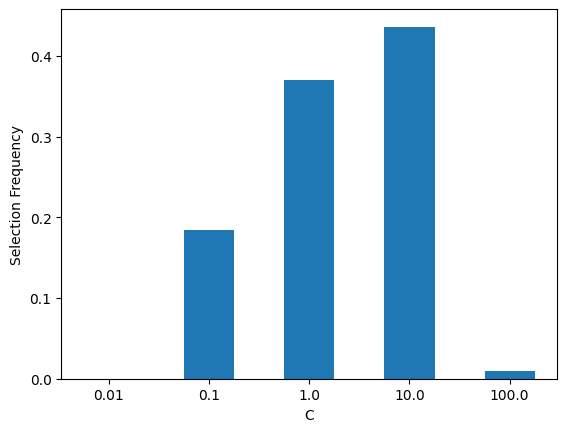

In [ ]:
#p11
from libsvm.svmutil import *
import numpy as np
import random
import matplotlib.pyplot as plt

C = np.array([0.01, 0.1, 1, 10, 100])


def train (train_y, train_x, valid_y, valid_x, C):
  prob = svm_problem(train_y, train_x)
  param = svm_parameter("-t 2 -c {} -r 1 -g 1".format(C))
  model = svm_train(prob, param)
  svm_save_model('model_svm_p10', model)
  p_label, p_acc, p_val = svm_predict(valid_y, valid_x, model)

  return p_label, p_acc, p_val, model


def solve():
  C_ans = np.zeros(5)

  for i in range(1000):
    acc_max = float('-inf')
    c_min = 0

    y, x = svm_read_problem("train.dat")

    # print(y[0], x[0])

    yx_pairs = list(zip(y,x))
    random.shuffle(yx_pairs)
    y, x = zip(*yx_pairs)
    y = list(y)
    x = list(x)

    # print(y[0],x[0])

    for j in range(len(y)):
      if y[j] == 1:
        y[j] = 1
      else:
        y[j] = -1

    valid_x = x[:200]
    valid_y = y[:200]
    train_x = x[200:]
    train_y = y[200:]

    for i in range(len(C)):
      p_label, p_acc, p_val, model = train(train_y, train_x, valid_y, valid_x, C[i])
      # print(p_acc[0])

      acc = p_acc[0]/100
      if acc > acc_max:
        c_min = C[i]
        acc_max = acc
      elif acc == max and C[i]< c_min:
        c_min = C[i]

    C_ans[np.where(C == c_min)]+=1
    print("c* = {}".format(acc_max))
    print("C_ans = {}".format(C_ans))

  return C_ans

C_ans = solve()

plt.bar(np.arange(len(C)), C_ans/1000,  width=0.5)
plt.xlabel("C")
plt.ylabel("Selection Frequency")
plt.xticks(np.arange(len(C)), C)
plt.show()


[ 4.07988715  3.3253759   1.34479703 -0.10014057  4.41553288  3.523976
  1.18968206 -0.14135742  4.23539019  3.73222802  1.10819774 -0.23543133
  4.43452231  3.7558059   1.35294476 -0.07559872  4.51865994  4.02785346
  1.56891915 -0.07321182  4.39388626  3.98687921  1.32362167 -0.1579779
  4.14716851  3.58559353  1.39450124 -0.0816636   4.26112977  3.95457967
  1.20315956 -0.15965847  4.30459298  3.8359682   1.0731006  -0.25737116]
[10.49895988  8.67163606  3.38812949 -0.38786869 11.3723578   9.24735738
  2.69891663 -0.49868484 10.48353096  9.66345559  2.65580154 -0.93543728
 11.76566218 10.19020245  3.75609219 -0.11308246 12.19269409 11.50593785
  4.59938724 -0.26979845 11.51567835 11.11919458  3.7125477  -0.58633307
 10.20691092  8.90624894  4.10384449  0.23148806 11.0315962  10.71000979
  3.24721619 -0.55461089 11.32474224 10.61783369  2.81786577 -0.97546274]
[20.17211264 16.12989478  5.76619246 -2.00756657 21.33600125 15.99425185
  3.0133542  -1.64026571 17.9543034  15.41981598  2.

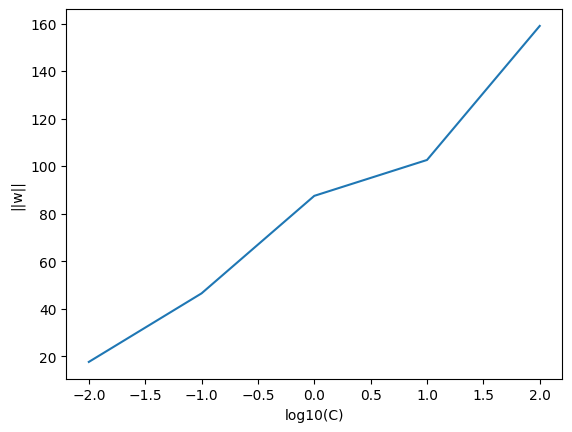

In [ ]:
#p12
from libsvm.svmutil import *
import numpy as np
import matplotlib.pyplot as plt

C = np.array([0.01, 0.1, 1, 10, 100])


def train (y, x, C):
  prob = svm_problem(y,x)
  param = svm_parameter("-t 2 -c {} -r 1 -g 1".format(C))
  model = svm_train(prob, param)
  svm_save_model('model_svm_p12', model)
  sv = model.get_SV()
  sv_coefs = [i[0] for i in model.get_sv_coef()]
  # print(model.get_sv_coef())
  # p_label, p_acc, p_val = svm_predict(y, x, model)

  return sv_coefs, sv, model

def solve():
  # acc_max = float('-inf')
  # c_min = 0
  w = np.array([])


  for i in range(len(C)):

    train_y , train_x = svm_read_problem("train.dat")
    for j in range(len(train_y)):
      if train_y[j] == 3:
        train_y[j] = 1
      else:
        train_y[j] = -1

    sv_coefs, sv, model = train(train_y, train_x, C[i])
    w_n = np.zeros(36)


    # print(len(sv))
    # print(len(sv_coefs))
    for n in range (len(sv)):
      sv_modified = np.array([])
      coef = sv_coefs[n]

      for k in range(36):
        if k+1 in sv[n]:
          sv_modified = np.append(sv_modified, sv[n][k+1])
        else:
          sv_modified = np.append(sv_modified, 0)
      w_n += sv_modified * coef

    print(w_n)
    w = np.append(w, np.linalg.norm(w_n))

  return w



w = solve()

print("\n")
print("the array of ||w||: {}".format(w))

plt.plot(np.log10(C), w)
plt.xlabel('log10(C)')
plt.ylabel('||w||')
plt.savefig("p12.png")

